In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium
from folium.plugins import MarkerCluster


In [2]:
# read the dataset
df = pd.read_csv("kc_house_data.csv")

In [3]:
# df.to_pickle('df.pkl')

In [4]:
df.shape  # we have 21613 rows and 21 columns

(21613, 21)

In [5]:
# To display available columns
df.columns   

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
# To see all columns
pd.set_option('display.max_columns', 25) 

In [7]:
# Check the datatype and number of nulls and rows
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### **Remark:**
The Dataframe does not contain any None or numpy.nan values. 

In [8]:
# To display the first 5 rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


    
#### **Observations:** 
    - The average price of houses in King County is USD 540K, and the median price is USD 450K, which is associated with the affordability of middle class family. 

    - However, the max selling price of house is USD 7.7 million, much larger than the median price.

    - Some of these values don't make a lot of sense in the context of house sales. For example, it should not be possible to sell a house with 0 bathrooms (interestingly, zero-bedroom dwellings are a defined and legal residential dwelling). 
    
    - It doesn't make sense to have a house with 33 bedrooms but only 1.75 bathrooms on 1620 square feet. 
    
    Let's remove these awkward values from the Dataframe. This will help us build a more accurate model later on.

In [10]:
df = df.drop(df[df.bedrooms == 33].index)
df = df.drop(df[df.bathrooms == 0].index)

In [11]:
df.shape

(21602, 21)

    - Since the Dataframe is storing House Sales as observations, it is not guaranteed that each observation is for a unique house. It may be the case that a house was sold several times between 2014-2015.

    - Let's remove all instances of duplicate houses. Since different observations on the same house represent different times the house was sold, let's resolve these entities by always using the most recent house sale. This way, we always preserve the most recent information about the house.

In [12]:
df = df.drop_duplicates(subset="id",keep="last")
df.shape

(21425, 21)

In [13]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.142500e+04,2.142500e+04,21425.000000,21425.000000,21425.000000,2.142500e+04,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000
mean,4.580800e+09,5.416890e+05,3.371622,2.118355,2082.934656,1.513553e+04,1.496103,0.007608,0.235053,3.410548,7.662404,1791.067445,291.867211,1971.099510,84.773302,98077.872765,47.560169,-122.213768,1988.386791,12784.237340
std,2.876763e+09,3.673044e+05,0.904648,0.768746,918.864625,4.154826e+04,0.540159,0.086893,0.767084,0.649970,1.172388,828.704669,442.846391,29.386517,402.529730,53.473991,0.138594,0.140816,685.472311,27380.809425
min,1.000102e+06,7.800000e+04,0.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,3.249000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904921e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068900e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.125000,2370.000000,10086.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#### Now , let us take a look at the price distribution

/tmp/ipykernel_7575/3432287105.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  price_dist = sns.distplot(df["price"])


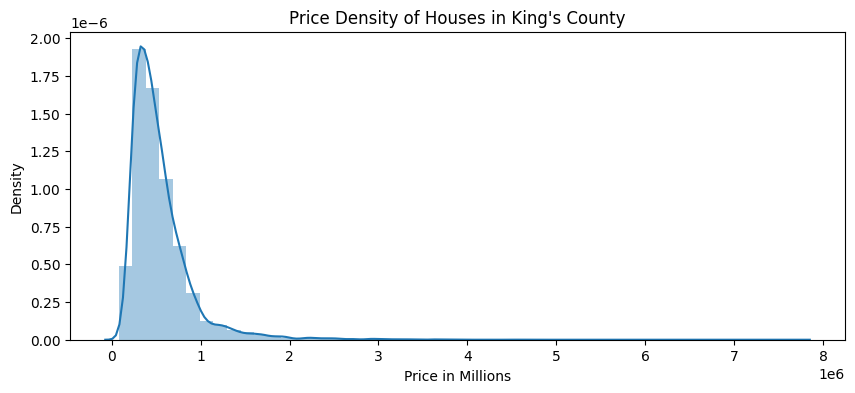

In [14]:
plt.figure(figsize=(10,4))
price_dist = sns.distplot(df["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses in King's County")
plt.show()

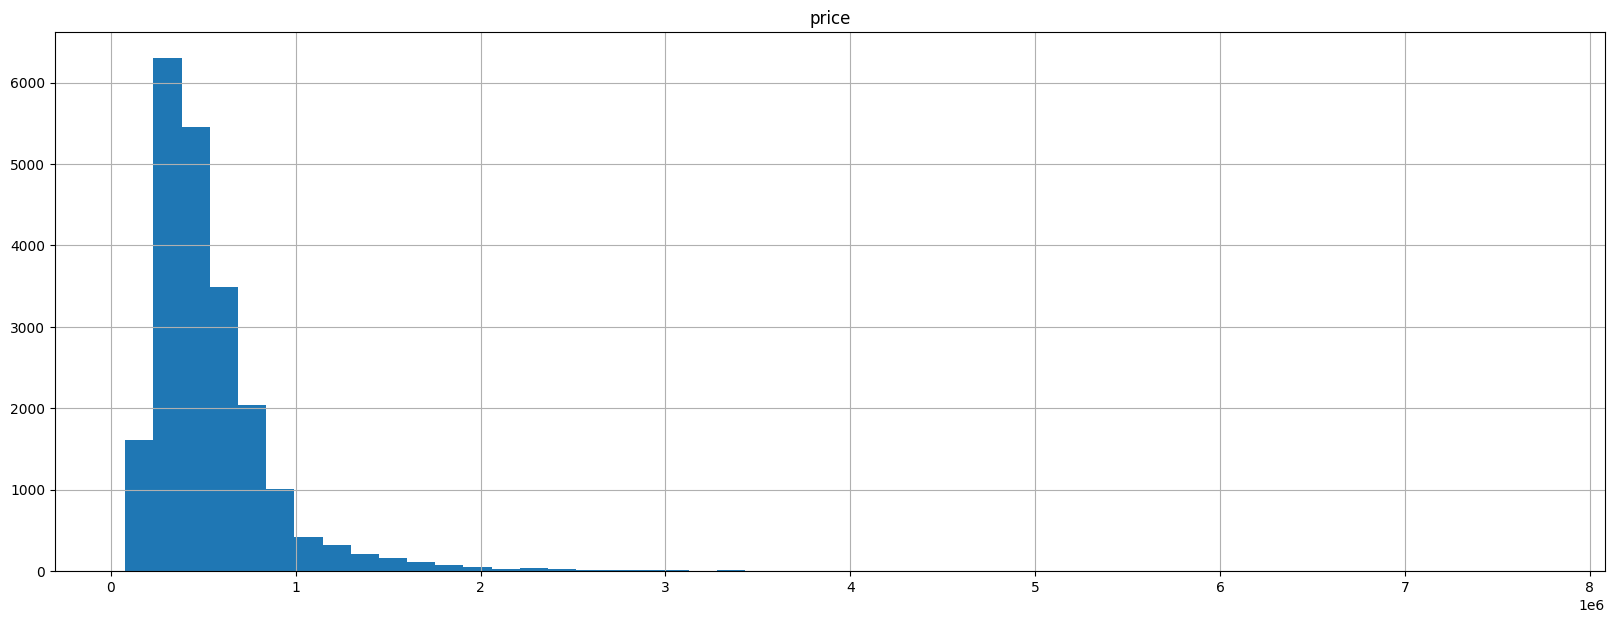

In [15]:
df.hist(column = 'price', bins = 50, figsize = (20, 7))
plt.show()


#### **Remarks:**

    - The price (target) has many outliers, and it is positively skewed, which makes it hard to generate a proper model to predict the price. This suggests that, on the more expensive side of houses, there's a large variety in the prices of houses.
    
    - We can see a lot of outliers from the price data as expected (it has a wide price range but this doesn't mean that the data is wrong).

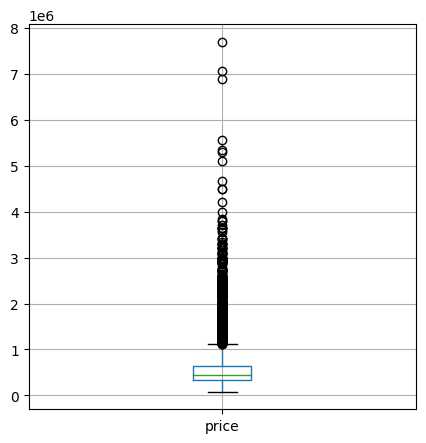

In [16]:
# Find the price distribution using boxplot
df.boxplot(column = 'price',figsize = (5, 5))
plt.show()

### How do the number of floors, bedrooms, and bathroooms affect price?
#### Impact of number of floors:


<Axes: xlabel='floors'>

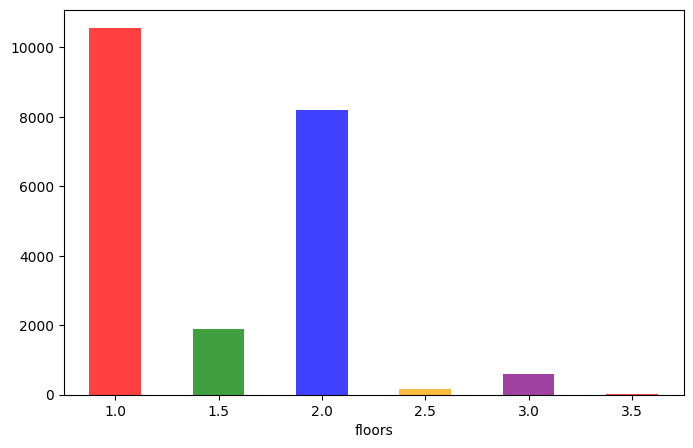

In [17]:
# Floor frequency

# Define colors for each bar
colors = ['red', 'green', 'blue', 'orange', 'purple']

df.groupby('floors')['price'].count().plot(kind='bar',alpha=0.75, rot=0, figsize=(8, 5),color=colors)

**Remark:** One floor houses are the most common, followed by the two floor houses. 

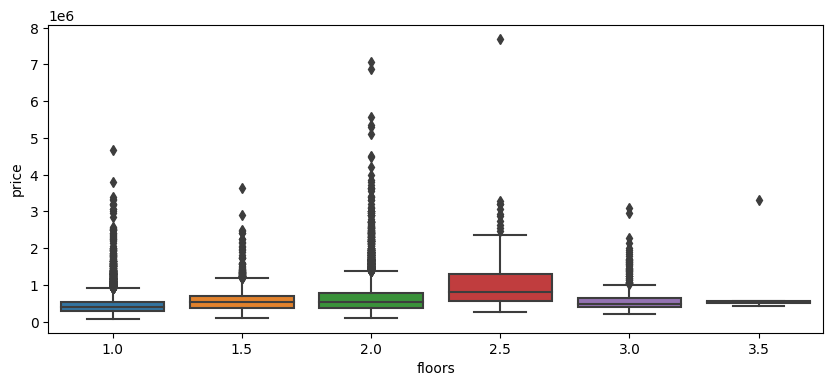

In [18]:
# Floor price distribution
plt.figure(figsize=(10, 4))
orders = df.sort_values('floors')['floors'].unique()
sns.boxplot(x = df['floors'], y = df['price'], order = orders)
plt.show()

**Remark:** 
2.5 and 3.5 floors have very noticeable outliers in house prices. Since these are pretty uncommon houses with very low frequency, we'll need to be careful in interpreting the information to account for these outliers.


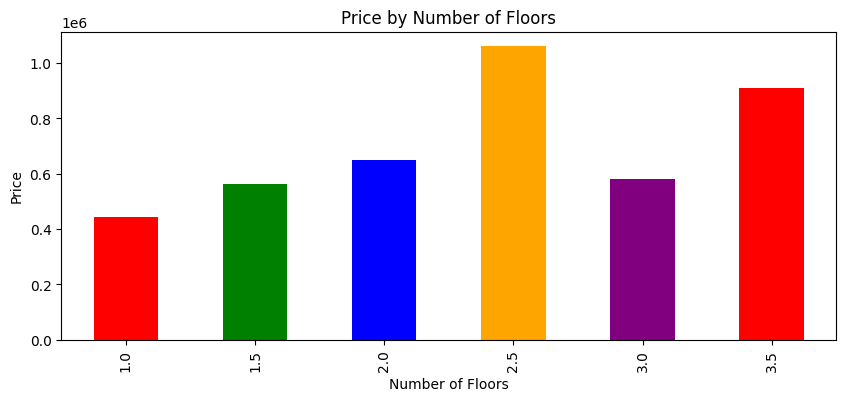

In [19]:
# Average prices
price_floors_med = df.groupby("floors")['price'].mean()
colors = ['red', 'green', 'blue', 'orange', 'purple']
price_floors_med.plot.bar(figsize=(10,4),color=colors)
# Set axis labels and chart title
plt.xlabel('Number of Floors')
plt.ylabel('Price')
plt.title('Price by Number of Floors')
plt.show()

**Remark :**

2.5 and 3.5 floor averages are inflated by the combination of their low frequency and large outliers. It's hard to take these into account with such little data, but it seems that, outside of these two outliers, the 2 floor houses have the highest overall prices. It's hard to tell if there's a strong correlation or not with number of floors, since the trend is so irregular and the range of floors is only 3.5.

#### Impact of number of bedrooms:

Text(0.5, 1.0, 'Number of houses by Number of Bedrooms')

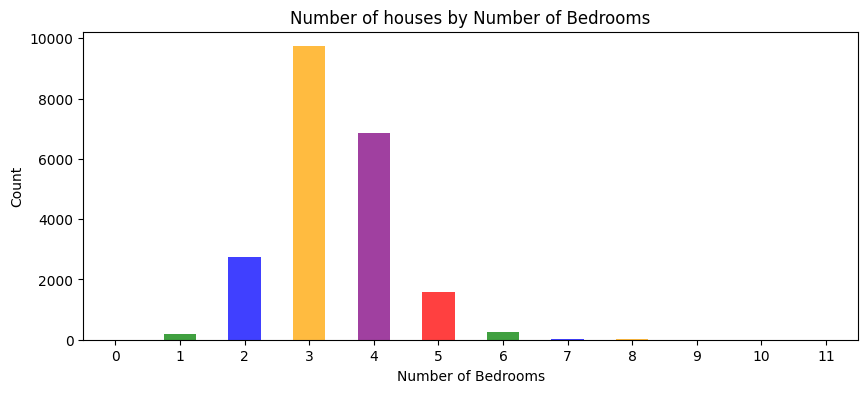

In [20]:
# Bedroom frequency
colors = ['red', 'green', 'blue', 'orange', 'purple']

df.groupby('bedrooms')['price'].count().plot(kind='bar',alpha=0.75, rot=0, figsize=(10, 4),color=colors)

# Set axis labels and chart title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Number of houses by Number of Bedrooms')

**Remark :**     Most houses have 3 bedrooms.

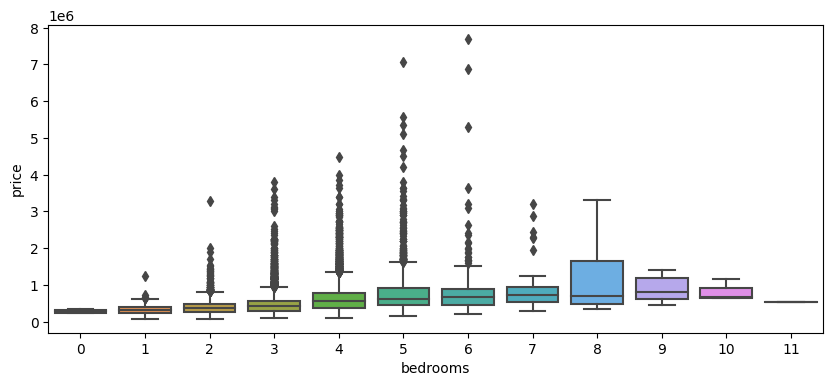

In [21]:
# Bedroom price distribution
plt.figure(figsize=(10, 4))
orders = df.sort_values('bedrooms')['bedrooms'].unique()
sns.boxplot(x = df['bedrooms'], y = df['price'], order = orders)
plt.show()

**Remark :**

    - For bedroom numbers 7 and 8, there seems to be a noticeable skew toward higher prices. Combined with low frequencies, we can expect these two to be some of the highest.
    - There is an increasing trend with number of bedrooms and price, it drops after 8 bedrooms. This could possibly be due to the small amount of data for higher bedroom houses, or those houses with that number of bedrooms may be undesirable in one way or another. Either way, there seems to be a noticeable positive correlation between number of bedrooms and price up until 8 bedrooms.


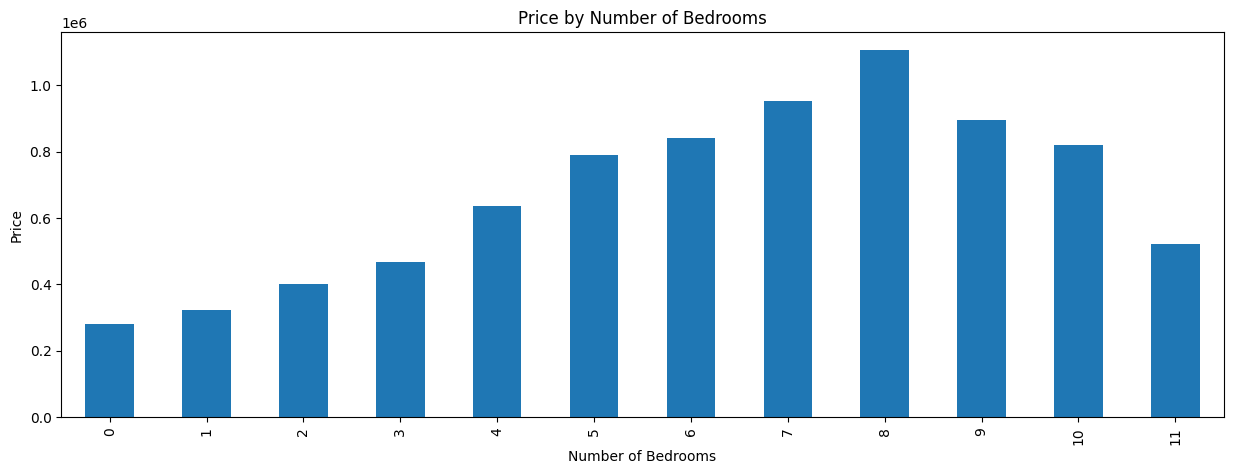

In [22]:
# Average prices
price_bedrooms_med = df.groupby("bedrooms")['price'].mean()
price_bedrooms_med.plot.bar(figsize=(15,5))
# Set axis labels and chart title
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price by Number of Bedrooms')
plt.show()

#### Impact of number of bathrooms:

Text(0.5, 1.0, 'Number of houses by Number of Bathrooms')

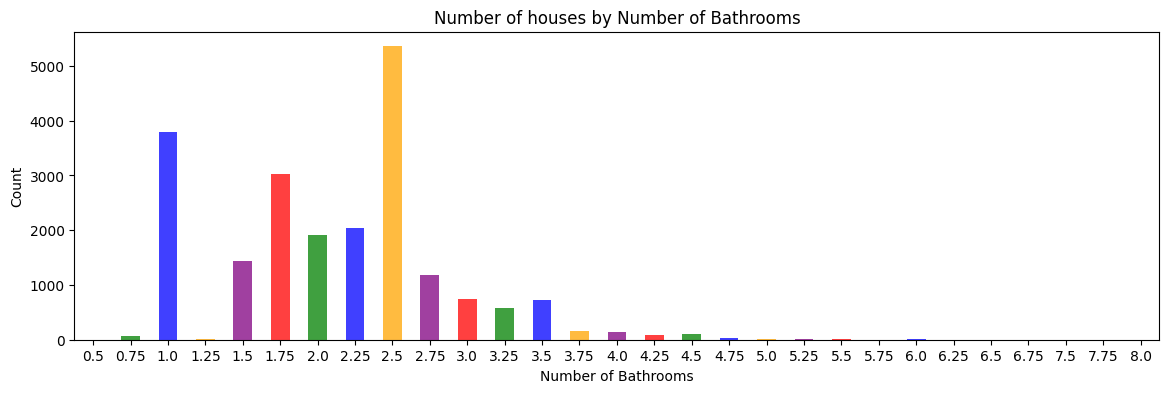

In [88]:
# Bathroom frequency
colors = ['red', 'green', 'blue', 'orange', 'purple']

df.groupby('bathrooms')['price'].count().plot(kind='bar',alpha=0.75, rot=0, figsize=(14, 4),color=colors)

# Set axis labels and chart title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Number of houses by Number of Bathrooms')

**Remark :** 

Most of the houses have 1 to 2.5 bathroom range, with relatively very few houses outside of that range.


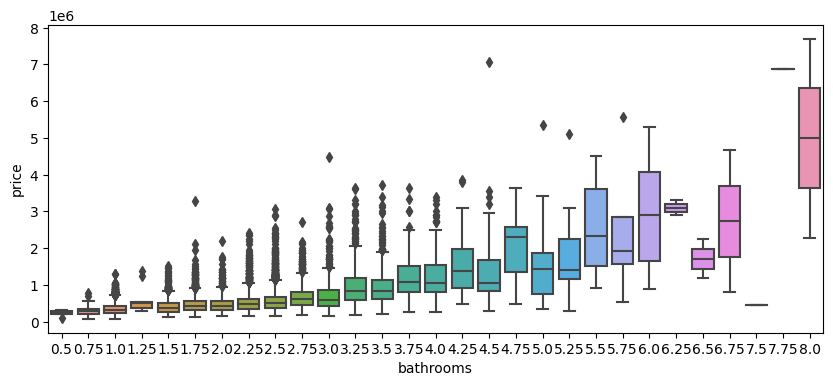

In [24]:
# Bathroom price distribution
plt.figure(figsize=(10, 4))
orders = df.sort_values('bathrooms')['bathrooms'].unique()
sns.boxplot(x = df['bathrooms'], y = df['price'], order = orders)
plt.show()

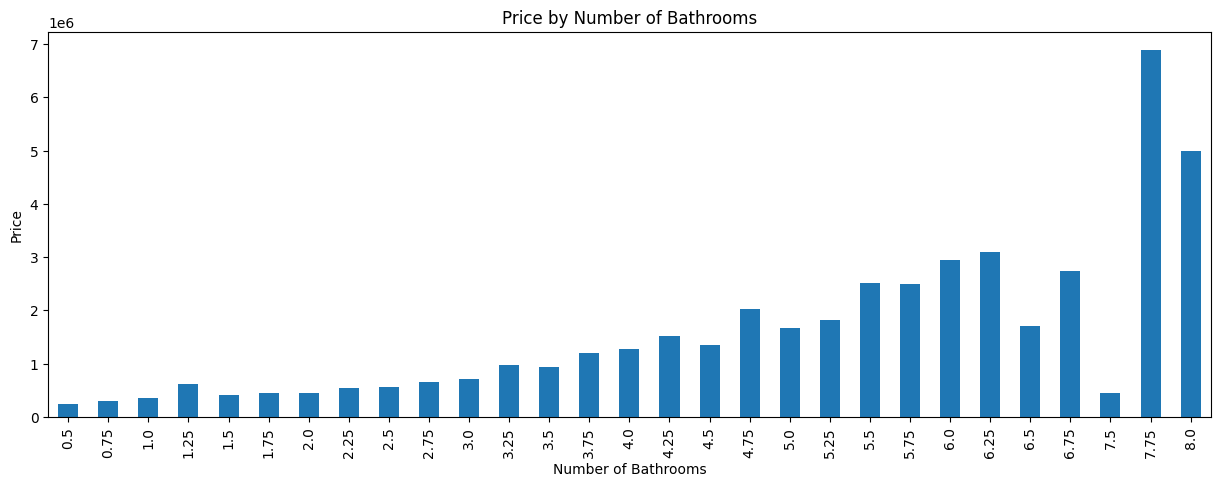

In [25]:
# Average prices
price_bathrooms_med = df.groupby("bathrooms")['price'].mean()
price_bathrooms_med.plot.bar(figsize=(15,5))
# Set axis labels and chart title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.title('Price by Number of Bathrooms')
plt.show()

**Remark :** 

Overall, it seems that there is a consistent increasing trend with the number of bathrooms. As mentioned before, above 4.5 bathrooms is a territory with few datapoints, but even excluding those, the trend seems to still hold.

#### Impact of renovation

In [26]:
# Add a new column to df with value 1 if the house is renovated and 0 otherwise
conditions = [df['yr_renovated'] == 0, df['yr_renovated'] != 0]

# we want to know if the house have renovation (True/False)
choices_done_reno = [0, 1]
df['done_reno'] = np.select(conditions, choices_done_reno)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,done_reno
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


done_reno
0    20515
1      910
Name: price, dtype: int64


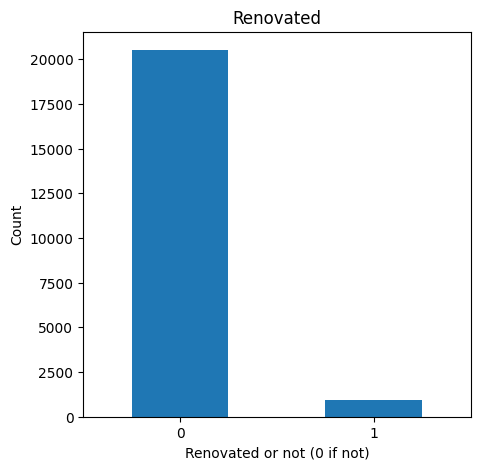

In [27]:
price_donereno_med = df.groupby("done_reno")['price'].size()
print(price_donereno_med)
price_donereno_med.sort_values(ascending = False).plot.bar(rot=0,figsize=(5,5))
# Set axis labels and chart title
plt.xlabel('Renovated or not (0 if not)')
plt.ylabel('Count')
plt.title('Renovated')
plt.show()

**Remark :** Renovations are rare.

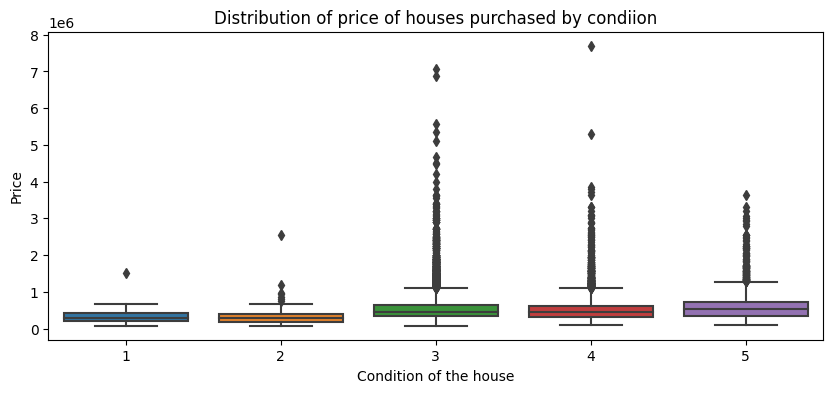

In [28]:
# Condition price distribution
plt.figure(figsize=(10, 4))
orders = df.sort_values('condition')['condition'].unique()
sns.boxplot(x = df['condition'], y = df['price'], order = orders)
# Set axis labels and chart title
plt.xlabel('Condition of the house')
plt.ylabel('Price')
plt.title('Distribution of price of houses purchased by condiion')
plt.show()

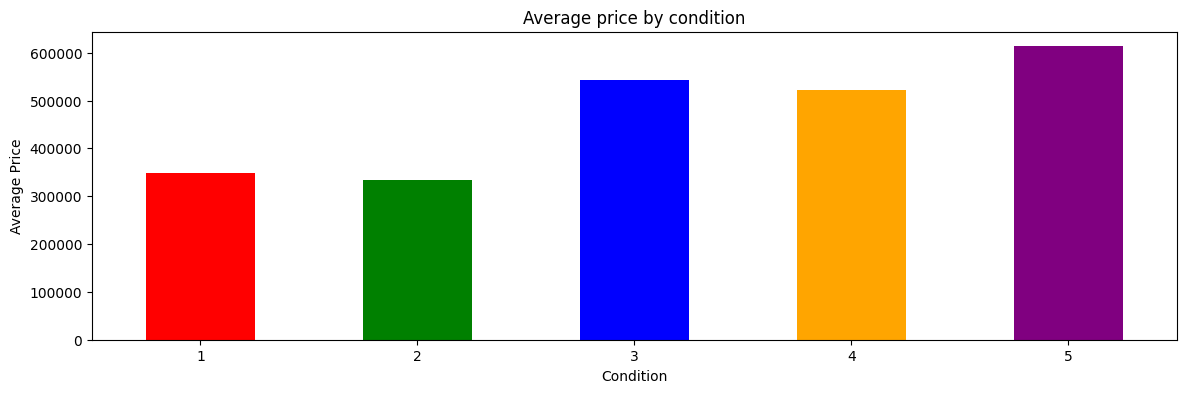

In [29]:
# Average prices
price_condition_med = df.groupby("condition")['price'].mean()
colors = ['red', 'green', 'blue', 'orange', 'purple']

price_condition_med.plot.bar(figsize=(14,4),color=colors,rot=0)
# Set axis labels and chart title
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.title('Average price by condition')
plt.show()

**Remark :** 

    - When the condition of the house is 3 or higher, its price is far greater.
    - Amongst houses of conditions 3-5, there's not a strict increase.
    - Condition 5 houses are the highest but this may also be due to being waterfront.

#### Impact of the condition and grade:
##### Distribution of condition

/tmp/ipykernel_7575/499213051.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  cond_dist = sns.distplot(df["condition"], kde=False)


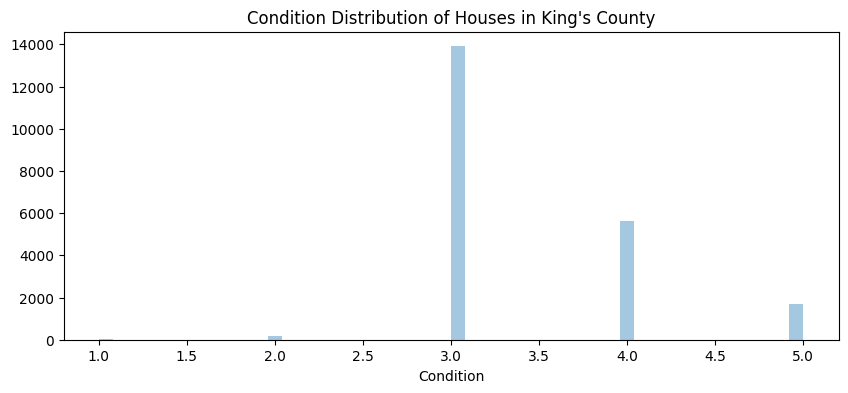

In [30]:
plt.figure(figsize=(10,4))

cond_dist = sns.distplot(df["condition"], kde=False)
cond_dist.set(xlabel="Condition", title="Condition Distribution of Houses in King's County")
plt.show()

**Remark :** 

The majority of houses are in condition 3, or middle of the road. 

##### Distribution of grade

/tmp/ipykernel_7575/667769487.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  cond_dist = sns.distplot(df["grade"], kde=False)


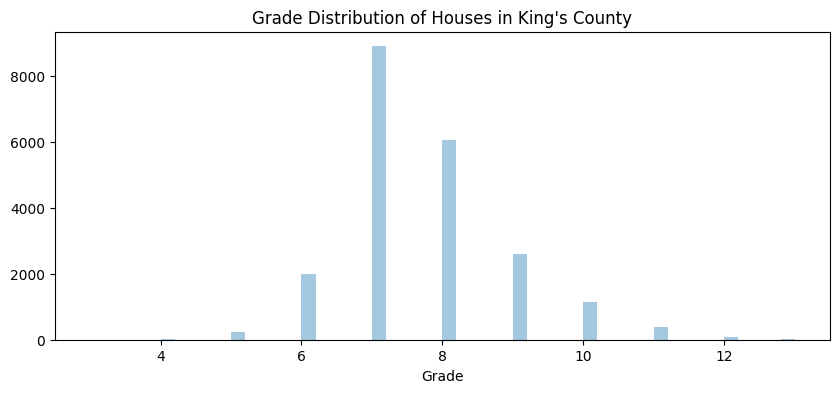

In [31]:
plt.figure(figsize=(10,4))

cond_dist = sns.distplot(df["grade"], kde=False)
cond_dist.set(xlabel="Grade", title="Grade Distribution of Houses in King's County")
plt.show()

**Remark :** 

It seems that the grades are distributed fairly unimodally, with the majority of houses at grade 7. There are very few houses below that grade, which could be due to a degree of self-selection.


#### Impact of waterfront

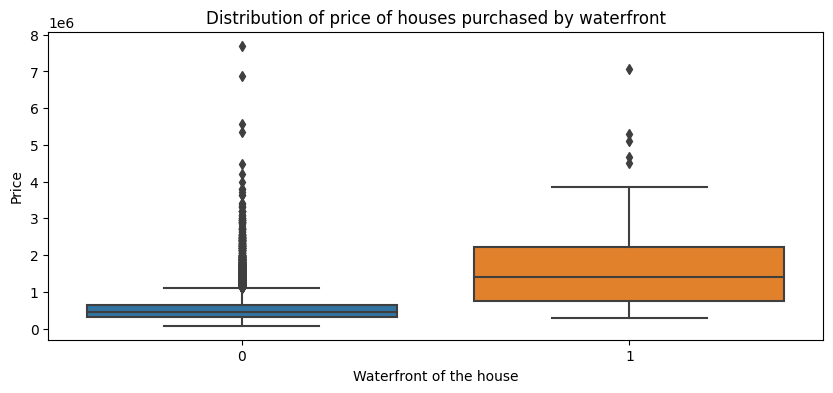

In [32]:
# Waterfront price distribution
plt.figure(figsize=(10, 4))
orders = df.sort_values('waterfront')['waterfront'].unique()
sns.boxplot(x = df['waterfront'], y = df['price'], order = orders)
# Set axis labels and chart title
plt.xlabel('Waterfront of the house')
plt.ylabel('Price')
plt.title('Distribution of price of houses purchased by waterfront')
plt.show()

**Remark :**

There are a few outliers in both situations, but due to fewer houses with a waterfront, the outliers will affect that group more, which is something we need to be careful of. However, the houses with a waterfront are overall more spread than those without pricewise, so it's reasonable to assume that its average will likely be higher regardless of outliers.


In [33]:
df[['waterfront']]

,waterfront
0,0
1,0
2,0
3,0
4,0
...,...
21608,0
21609,0
21610,0
21611,0


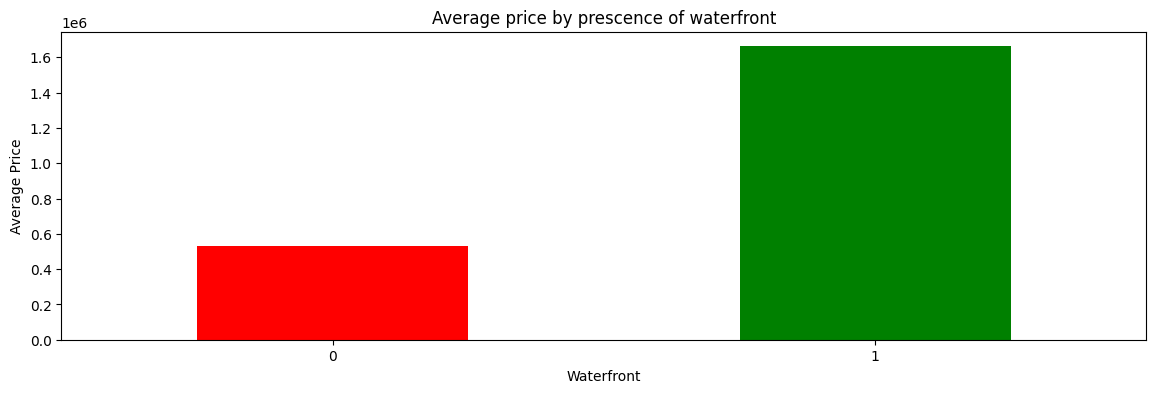

In [34]:
# Average prices
price_waterfront_av = df.groupby("waterfront")['price'].mean()
colors = ['red', 'green']

price_waterfront_av.plot.bar(figsize=(14,4),color=colors,rot=0)
# Set axis labels and chart title
plt.xlabel('Waterfront')
plt.ylabel('Average Price')
plt.title('Average price by prescence of waterfront')
plt.show()

**Remark :**

There is a big difference pricewise between houses with a waterfront and houses without.

In [80]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'done_reno'],
      dtype='object')

#### Calculate the age of the house

In [81]:
# Extract the year in order to calculate the age of the house. Change its type
df['year_sold'] = pd.to_datetime(df['date']).dt.date.astype('datetime64[ns]')
df['year_sold'] = pd.DatetimeIndex(df['year_sold']).year # extract only year
# Find the age of the house and add its column to df
df['age_house'] = (df['year_sold'] - df['yr_built']).astype(int)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,done_reno,year_sold,age_house
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,59
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,2014,63
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,2015,82
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,2014,49
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,2015,28


#### Impact of house age

Text(0.5, 1.0, 'Number of houses by age_house')

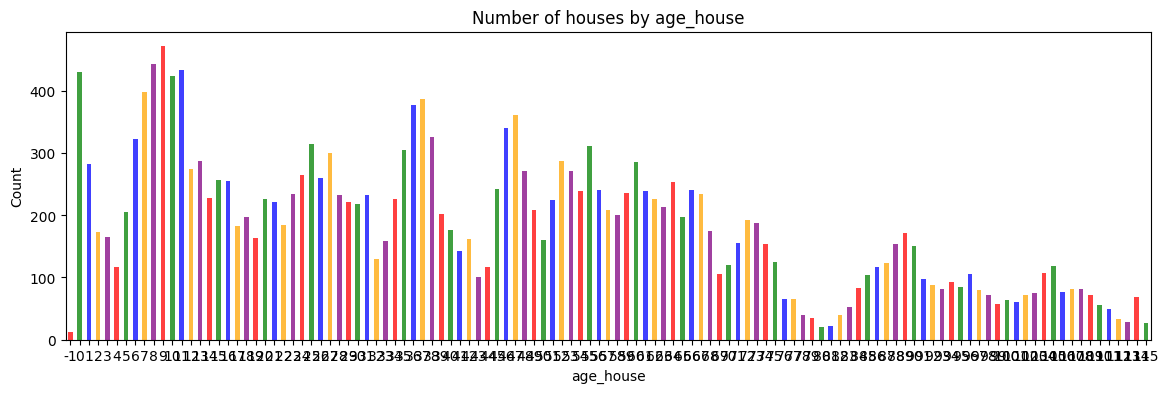

In [90]:
# house_age frequency
colors = ['red', 'green', 'blue', 'orange', 'purple']

df.groupby('age_house')['price'].count().plot(kind='bar',alpha=0.75, rot=0, figsize=(14, 4),color=colors)

# Set axis labels and chart title
plt.xlabel('age_house')
plt.ylabel('Count')
plt.title('Number of houses by age_house')

In [91]:
bins = [-2, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000]
labels = ['<1', '1-10', '11-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100'] # e.g., (1-10]
df['age_house_binned'] = pd.cut(df['age_house'], bins = bins, labels = labels)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,done_reno,year_sold,age_house,age_house_binned
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,59,50-60
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,2014,63,60-70
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,2015,82,80-90
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,2014,49,40-50
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,2015,28,20-30


Text(0.5, 1.0, 'Number of houses by age_house')

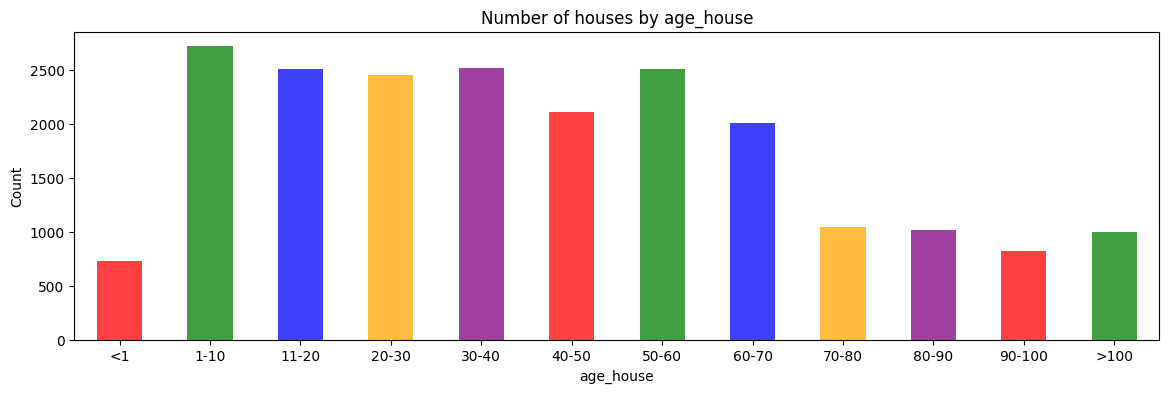

In [92]:
# house_age frequency
colors = ['red', 'green', 'blue', 'orange', 'purple']

df.groupby('age_house_binned')['price'].count().plot(kind='bar',alpha=0.75, rot=0, figsize=(14, 4),color=colors)

# Set axis labels and chart title
plt.xlabel('age_house')
plt.ylabel('Count')
plt.title('Number of houses by age_house')

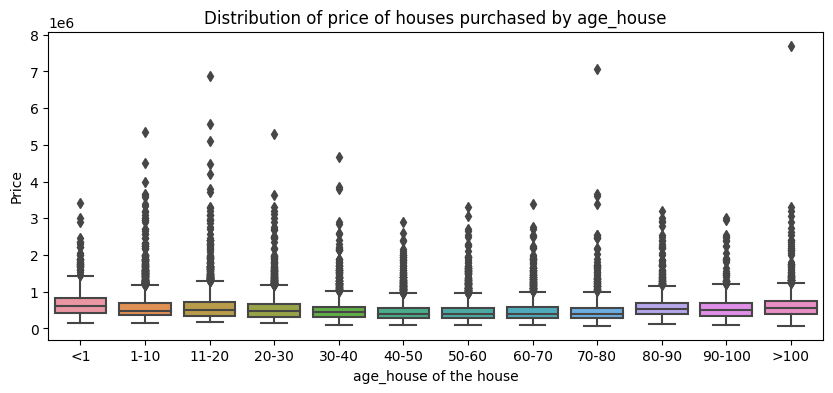

In [87]:
# Age house price distribution
plt.figure(figsize=(10, 4))
orders = df.sort_values('age_house_binned')['age_house_binned'].unique()
sns.boxplot(x = df['age_house_binned'], y = df['price'], order = orders)
# Set axis labels and chart title
plt.xlabel('age_house of the house')
plt.ylabel('Price')
plt.title('Distribution of price of houses purchased by age_house')
plt.show()

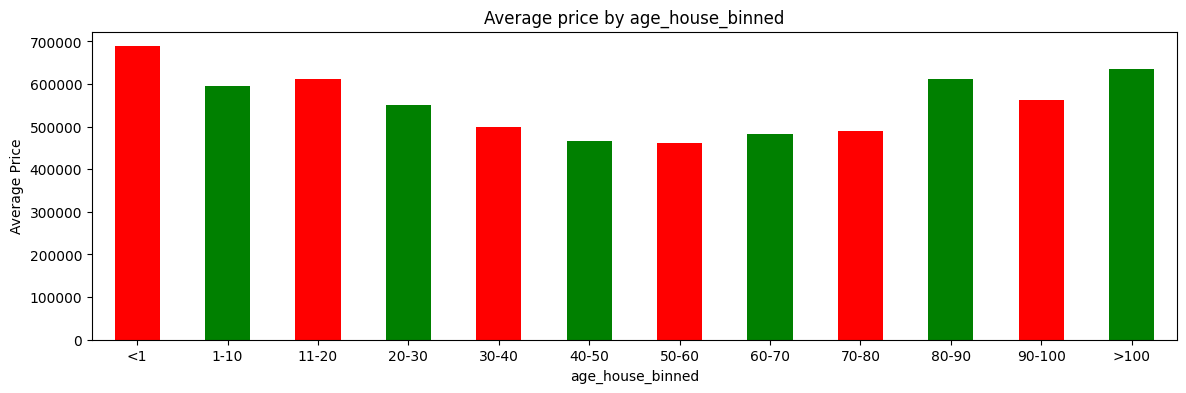

In [93]:
# Average prices
price_waterfront_av = df.groupby("age_house_binned")['price'].mean()
colors = ['red', 'green']

price_waterfront_av.plot.bar(figsize=(14,4),color=colors,rot=0)
# Set axis labels and chart title
plt.xlabel('age_house_binned')
plt.ylabel('Average Price')
plt.title('Average price by age_house_binned')
plt.show()

/tmp/ipykernel_7575/3390162799.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  house_corr = df.corr()


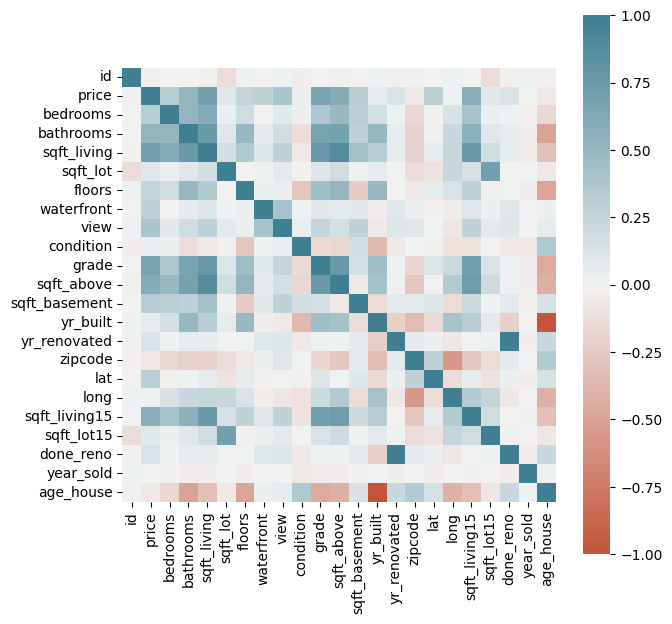

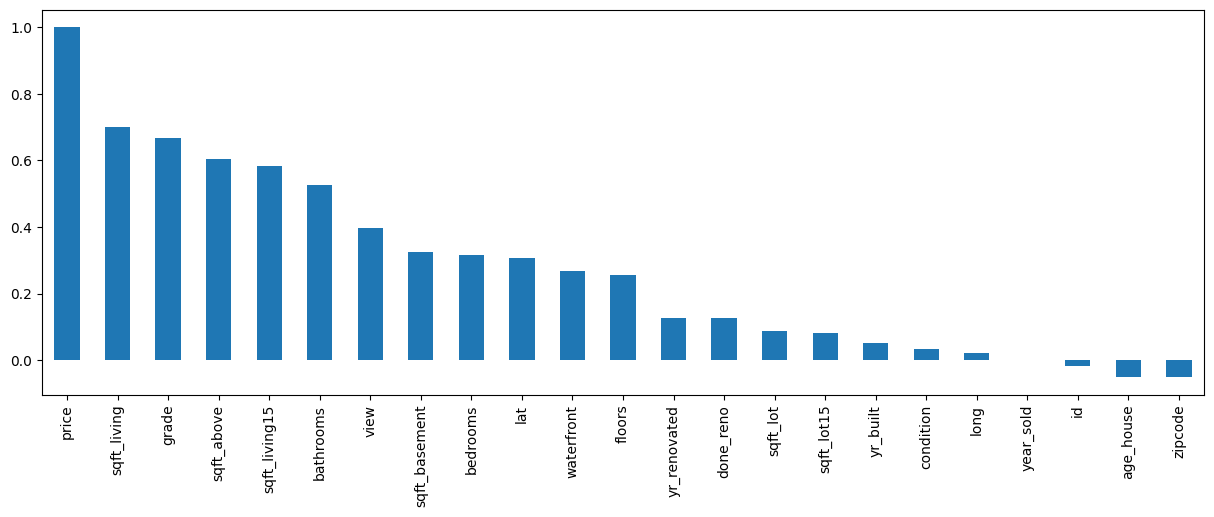

In [94]:
house_corr = df.corr()

plt.figure(figsize=(7,7))
sns.heatmap(house_corr, 
    xticklabels = house_corr.columns.values, # x labels
    yticklabels = house_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = sns.diverging_palette(20, 220, n = 200), # color palette
    square = True) # each cell will be square-shaped
plt.show()

house_corr['price'].sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

**Remarks :**
 - From the chart, we found out price is closely associated with sqft_living , grade, sqft_above, sqft_living15, bathrooms, and view. The more space you get, the higher is the price. 
 - When the age_house is less and renovated, the price is higher. (that is a newer house has a better price). 
 - Most houses don't have a basement, so the living footage (sqrt_living) is positively correlated with sqft_above. 
 - The neighborhood living space (sqrt_living15) and lot space (sqrt_lot15) are correlated with the house living space (sqrt_living) and lot pace(sqrt_lot) as expected. The similar types of houses tend to gather together. 
 - Note that it is natural to see the yr_built is negatively correlated with age_house (aggregated feature).

In [35]:
# # Extract the year in order to calcuate the age of the house. Change its type
# df['year_sold'] = pd.to_datetime(df['date']).dt.date.astype('datetime64[ns]')
# df['year_sold'] = pd.DatetimeIndex(df['year_sold']).year # extract only year
# df.head()


In [36]:
# # To check if a new column 'year_sold' is added
# df.info()

In [37]:
# df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'done_reno'],
      dtype='object')

### Preparing the Dataframe for linear regression

In [38]:
# Drop unuseful columns for our analysis
df_new = df.drop(['id', 'date','yr_renovated', 'done_reno','waterfront', "lat", "long", "zipcode",'yr_built'], axis = 1, inplace = False)
df_new

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,3,8,1530,0,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,3,8,2310,0,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,3,7,1020,0,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,3,8,1600,0,1410,1287


In [77]:
df_new.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.141800e+04,21418.000000,21418.000000,21418.000000,2.141800e+04,21418.000000,21418.000000,21418.000000,21418.000000,21418.000000,21418.000000,21418.000000,21418.000000
mean,5.401360e+05,3.370903,2.116853,2080.205668,1.511637e+04,1.495915,0.234149,3.410636,7.660846,1789.240825,290.964843,1987.718601,12769.244841
std,3.554206e+05,0.903825,0.764049,906.064863,4.150483e+04,0.540052,0.765152,0.650028,1.169334,822.163654,439.602945,684.526865,27344.414504
min,7.800000e+04,0.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,399.000000,651.000000
25%,3.248910e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.610000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068125e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,2370.000000,10082.250000
max,5.350000e+06,11.000000,7.500000,8020.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8020.000000,3500.000000,6210.000000,871200.000000




#### Linear regression has 5 key assumptions:

    - The input variables are independent from one another
    - The true relationship between independent and dependent variables is linear (our features having a linear relationship with price.)
    - The model error is normally distributed
    - The model errors are homoscedastic (in other orders, variability in output does not change as inputs change)

To ensure that our features are independent from one another, let's create a correlation matrix to view the relationship between our features.
##### Correlation matrix


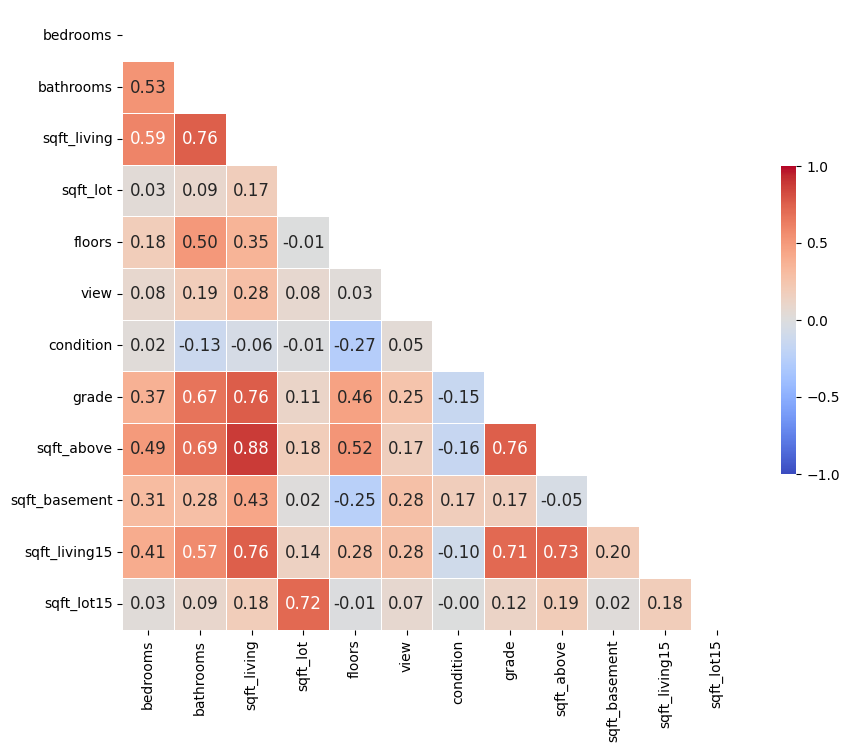

In [39]:
f, ax = plt.subplots(figsize=(10, 10)) 

corrMatrix = df_new.drop("price",axis=1).corr()
mask = np.zeros_like(corrMatrix, dtype=bool)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corrMatrix, 
            mask=mask,
            square = True,
            linewidths = .5,
            cmap = "coolwarm",
            cbar_kws = {'shrink': .4, 
                    "ticks" : [-1, -.5, 0, 0.5, 1]},
            vmin = -1, 
            vmax = 1,
            annot = True,
            annot_kws = {"size": 12},
            fmt = ".2f")

ax.set_yticklabels(corrMatrix.columns, rotation = 0)
ax.set_xticklabels(corrMatrix.columns)
plt.show()

In [40]:
# # Find the age of the house and add its column to df
# df['age_house'] = (df['year_sold'] - df['yr_built']).astype(int)
# df.head()

In [41]:
# # calculate the number of years from renovation to sold. if no renovation is made, then consider the built year as first renovation.
# conditions = [df['yr_renovated'] == 0, df['yr_renovated'] != 0]
# choices_age = [df['year_sold'] - df['yr_built'], df['year_sold'] - df['yr_renovated']]
# df['age_renovated'] = np.select(conditions, choices_age)
# # we want to know if the house have renovation (True/False)
# choices_done_reno = [0, 1]
# df['done_reno'] = np.select(conditions, choices_done_reno)

In [42]:
# df.groupby('age_house')['price'].describe().head()

In [43]:
# df.groupby('age_house')['price'].count().plot(kind='bar',alpha=0.75, rot=90, figsize=(20, 2))

In [44]:
# bins = [-2, 1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 100000]
# labels = ['<1', '1-10', '11-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '>100'] # e.g., (1-10]
# df['age_house_binned'] = pd.cut(df['age_house'], bins = bins, labels = labels)
# df.head()

In [45]:
# df.groupby('age_house_binned')['price'].count().plot(kind='bar',alpha=0.75, rot=90, figsize=(8, 3))

In [46]:
# # A quick summary of the data
# df.describe(include = 'all')

Remark: the price (our target) has a high standard deviation which leads to a wide range of distribution.

In [47]:
# # Find the price distribution using boxplot
# df.boxplot(column = 'price',figsize = (5, 10))
# plt.show()

In [48]:
# df

In [49]:
from folium.plugins import HeatMap
# create a base map
basemap = folium.Map(location=[df['lat'].mean(),df['long'].mean()], zoom_start = 9)

# add heatmap
coordinate_copy = df[['lat','long']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['lat','long']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map


In [50]:
def get_center_latlong(df):
    # get the center of my map for plotting
    centerlat = (df['lat'].max() + df['lat'].min()) / 2
    centerlong = (df['long'].max() + df['long'].min()) / 2
    return centerlat, centerlong

In [51]:
# grab the center of our map using our cool function
center = get_center_latlong(df)

# create a new map object
map = folium.Map(location=center, zoom_start=10)

# save our map to an interactive html file
# map.save('circle_map.html')

In [52]:
# # Same as before, we get the center and make the map object
# center = get_center_latlong(df)
# map = folium.Map(location=center, zoom_start=10)

# # go through each home in set, make circle, and add to map.
# for i in range(len(df)):
#     folium.Circle(
#         location=[df.iloc[i]['lat'], df.iloc[i]['long']],
#         radius=10,
#         popup=folium.Popup(
#             "<b>Price:</b> ${}<br><b>Zipcode:</b> {}".format(df.iloc[i]['price'], df.iloc[i]['zipcode']),
#             max_width=200,
#         ),
#     ).add_to(map)

# # Same as before, we save it to file
# map.save('circle_map.html')
# map

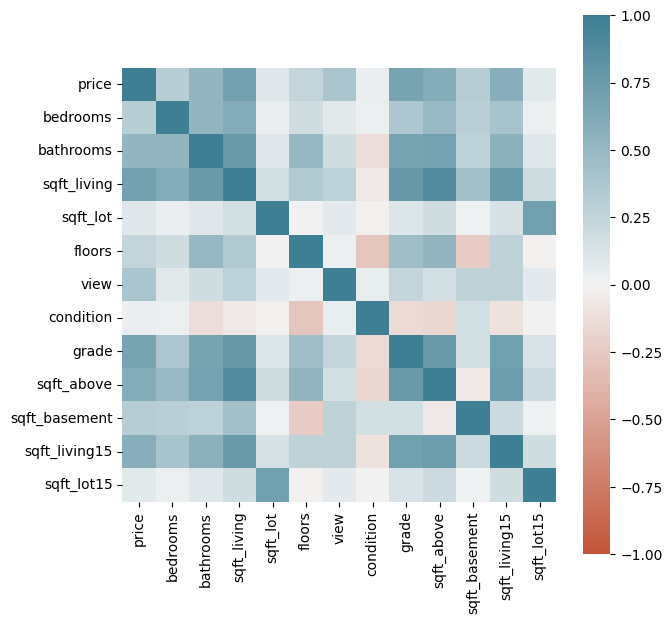

In [53]:
house_corr = df_new.corr()

plt.figure(figsize=(7,7))
sns.heatmap(house_corr, 
    xticklabels = house_corr.columns.values, # x labels
    yticklabels = house_corr.columns.values, # y labels
    vmin = -1, # color scale the min value
    vmax = 1, # color scale the max
    center = 0, # color scale place at the center at 0
    cmap = sns.diverging_palette(20, 220, n = 200), # color palette
    square = True) # each cell will be square-shaped
plt.show()



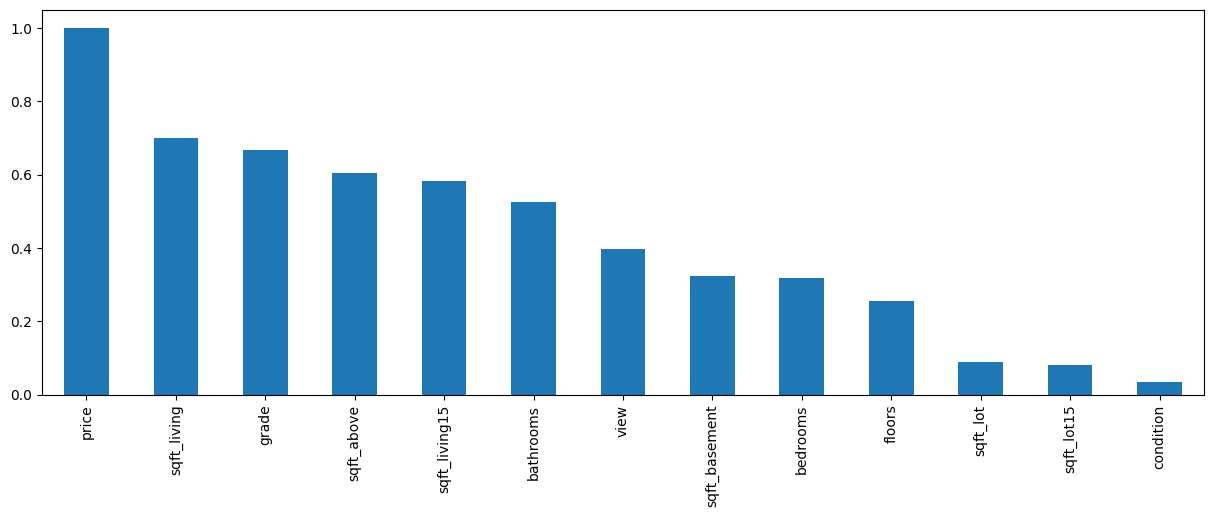

In [54]:
house_corr['price'].sort_values(ascending = False).plot.bar(figsize=(15,5))
plt.show()

**Remarks :**
- From the chart, we found out price is closely associated with sqft_living , grade, sqft_above, sqft_living15, bathrooms, and view. The more space you get, the higher is the price. 
- When the age_house is less and renovated, the price is higher. (that is a newer house has a better price). 
- Most houses don't have a basement, so the living footage (sqrt_living) is positively correlated with sqft_above. 
- The neighborhood living space (sqrt_living15) and lot space (sqrt_lot15) are correlated with the house living space (sqrt_living) and lot pace(sqrt_lot) as expected. The similar types of houses tend to gather together. 
- Note that it is natural to see the yr_built is negatively correlated with age_house (aggregated feature).

### Data Visualization
- ##### Price vs. Living Space (sqft_living)

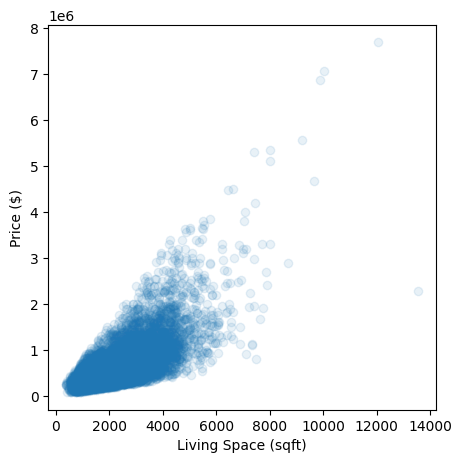

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(df_new['sqft_living'], df_new['price'], alpha = 0.1)
plt.xlabel("Living Space (sqft)")
plt.ylabel("Price ($)")
plt.show()

**Remark:** 
   Larger living space sells at a better price (both are positively correlated)

In [56]:
df_new.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.142500e+04,21425.000000,21425.000000,21425.000000,2.142500e+04,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000,21425.000000
mean,5.416890e+05,3.371622,2.118355,2082.934656,1.513553e+04,1.496103,0.235053,3.410548,7.662404,1791.067445,291.867211,1988.386791,12784.237340
std,3.673044e+05,0.904648,0.768746,918.864625,4.154826e+04,0.540159,0.767084,0.649970,1.172388,828.704669,442.846391,685.472311,27380.809425
min,7.800000e+04,0.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,399.000000,651.000000
25%,3.249000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068900e+04,2.000000,0.000000,4.000000,8.000000,2220.000000,560.000000,2370.000000,10086.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000,4820.000000,6210.000000,871200.000000


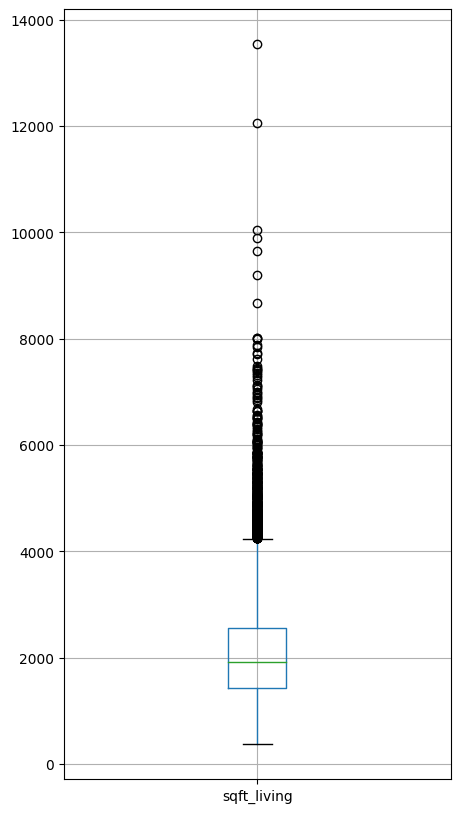

In [57]:
# Find the sqft_living distribution using boxplot
df_new.boxplot(column = 'sqft_living',figsize = (5, 10))
plt.show()

# plt.figure(figsize=(15, 5))
# orders = list((range(1, 14)))
# sns.boxplot(x = df['sqft_living'], y = df['price'], order = orders)
# plt.show()

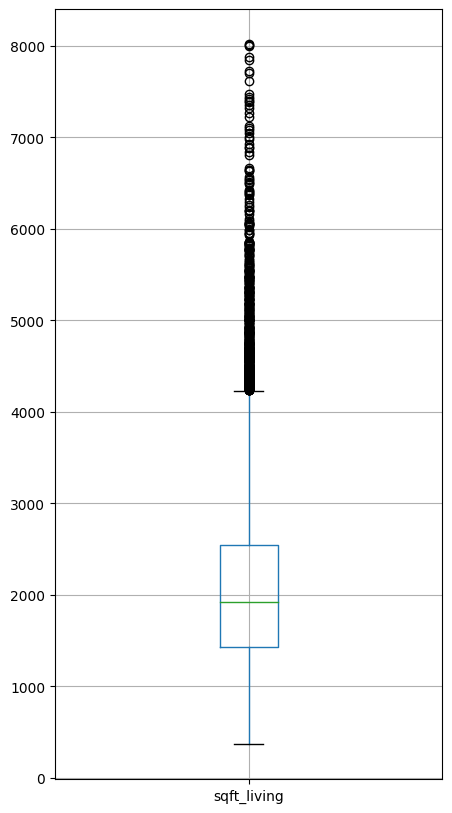

In [58]:
# delete the outliers of sqft_living >8100
df_new = df_new[df_new['sqft_living'] < 8100]
df_new.boxplot(column = 'sqft_living',figsize = (5, 10))
plt.show()

# plt.figure(figsize=(15, 5))
# sns.boxplot(x = df['sqft_living'], y = df['price'])
# plt.show()

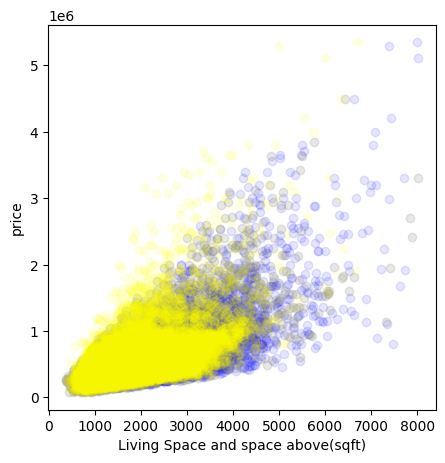

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(df_new['sqft_living'],df_new['price'], alpha=0.1, c='blue')
plt.scatter(df_new['sqft_above'],df_new['price'], alpha=0.1, c='yellow')
plt.xlabel("Living Space and space above(sqft)")
plt.ylabel("price")
plt.show()

**Remark:**

Most houses don’t have basement, the living space is mostly equal to the space above.

- ##### Price vs. Grade

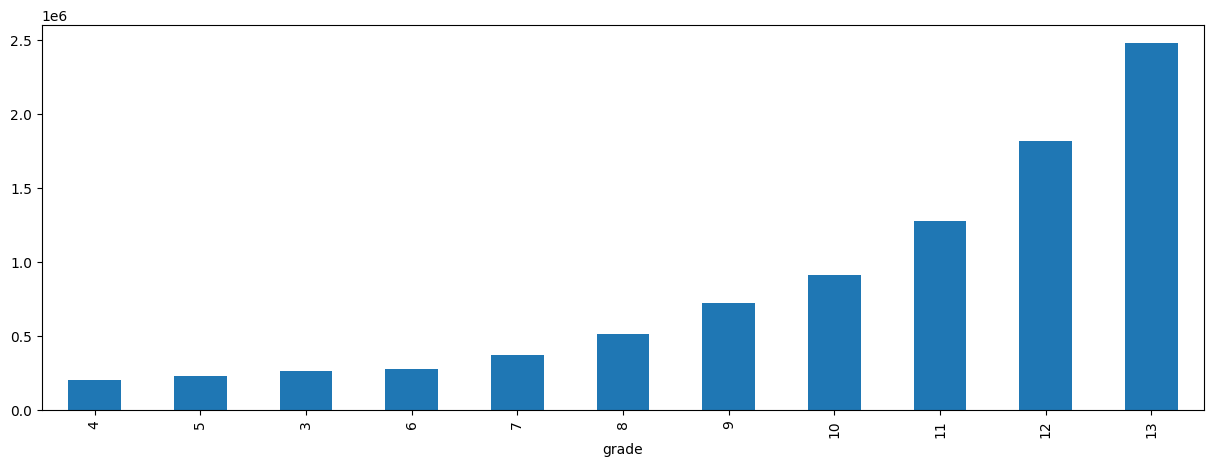

In [60]:
price_grade_med = df_new.groupby("grade")['price'].median()
price_grade_med.sort_values(ascending = True).plot.bar(figsize=(15,5))
plt.show()

**Remark:** 
   Better grade sell at a better price (both are positively correlated)

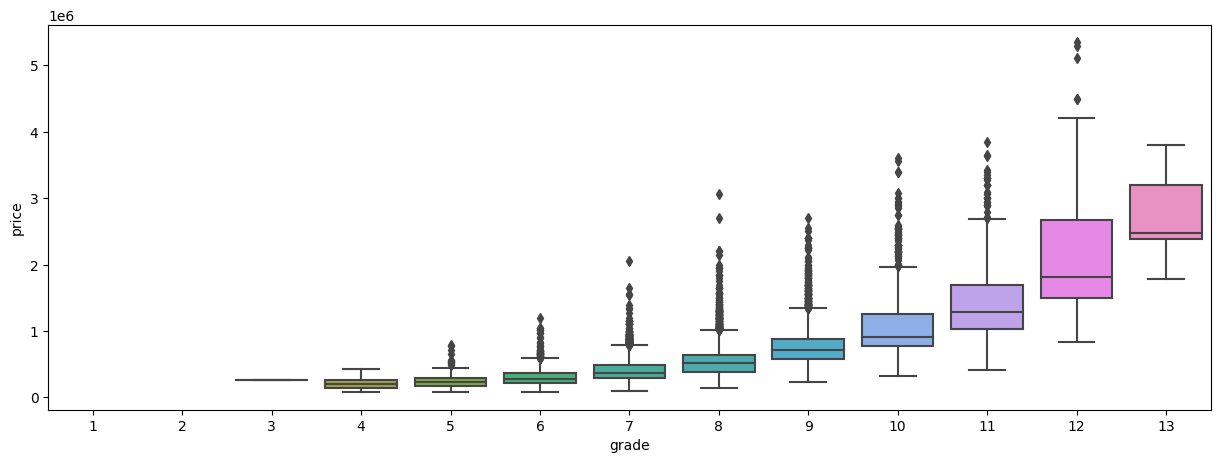

In [61]:
plt.figure(figsize=(15, 5))
orders = list((range(1, 14)))
sns.boxplot(x = df_new['grade'], y = df_new['price'], order = orders)
plt.show()

Note that grade 3 has fewer data and it has higher median price, and there is no grade 2 data.

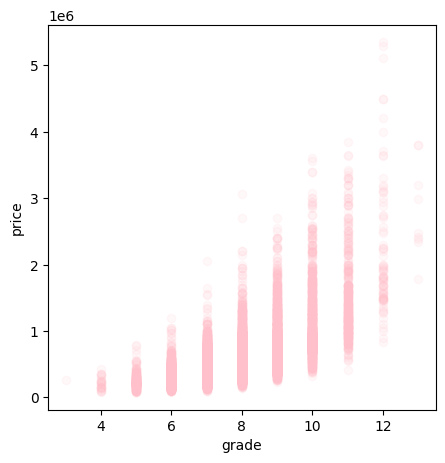

In [62]:
plt.figure(figsize=(5,5))
plt.scatter(df_new['grade'],df_new['price'], alpha=0.1, c='pink')
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

- ##### Price vs. bathrooms

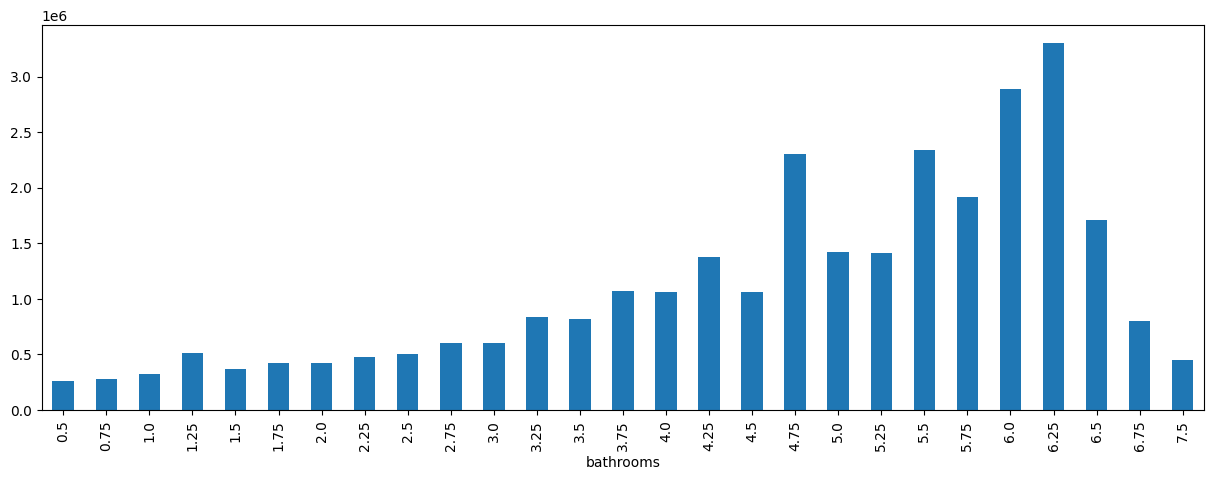

In [63]:
price_bathrooms_med = df_new.groupby("bathrooms")['price'].median()
price_bathrooms_med.plot.bar(figsize=(15,5))
plt.show()

**Remarks :** 
   - More bathrooms sell a better price (both are positively correlated)
   - 7.5 bothrooms doen't have a good price but because we only have one data point. We can see the trend (more bathrooms, higher price) is valid when we have more data points.

In [64]:
df['bathrooms'].mean()

2.1183547257876314

In [65]:
df['bathrooms'].median()

2.25

- ##### Price vs. view

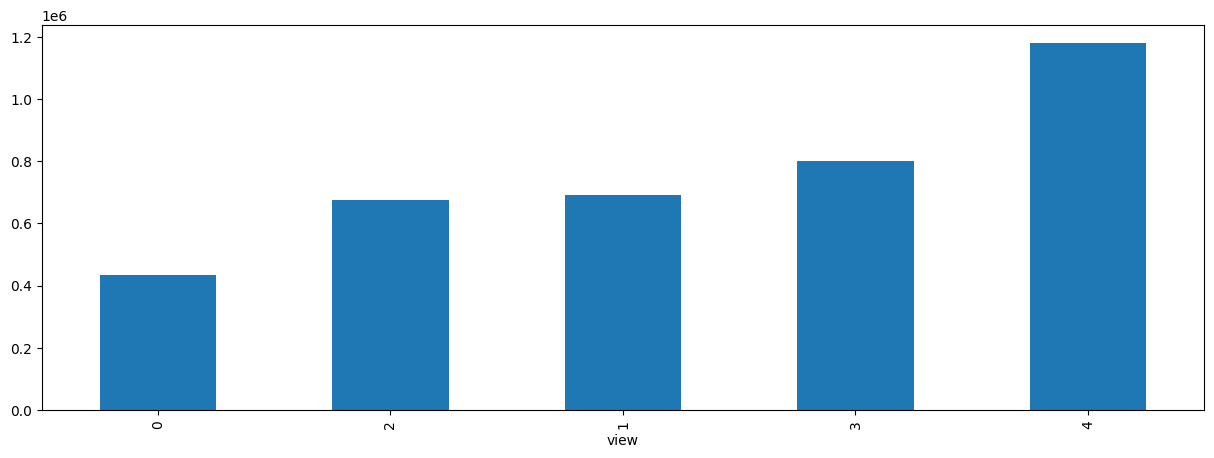

In [66]:
price_view_med = df.groupby("view")['price'].median()
price_view_med.sort_values(ascending = True).plot.bar(figsize=(15,5))
plt.show()

**Remark:** 
   Better view comes with a higher price !

- ##### Price vs. renovation

done_reno
0    449950.0
1    600500.0
Name: price, dtype: float64


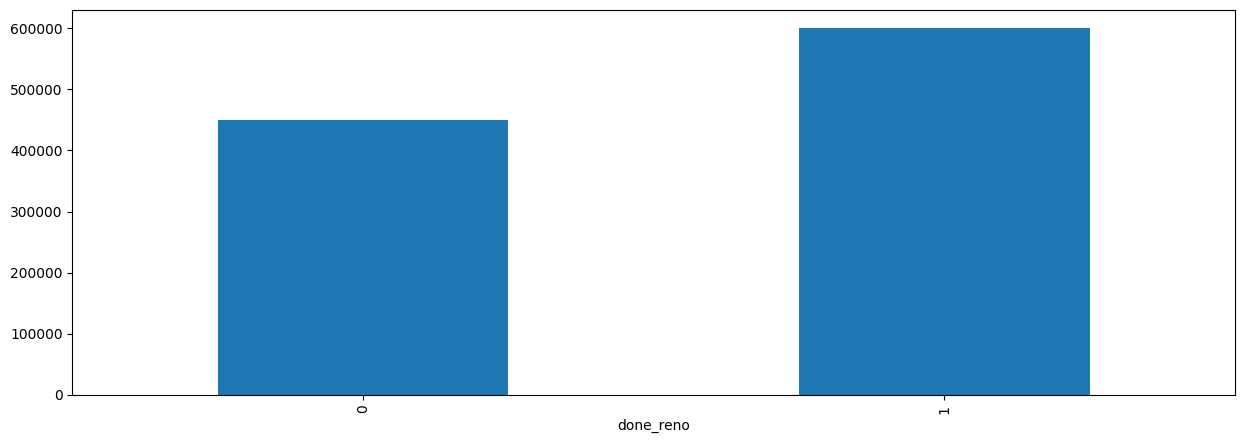

In [67]:
price_donereno_med = df.groupby("done_reno")['price'].median()
print(price_donereno_med)
price_donereno_med.sort_values(ascending = True).plot.bar(figsize=(15,5))
plt.show()

**Remark:** 
   The house with rennovation can sell a slightly better price.

- ##### Price vs. Age of house

In [68]:
# price_age_house_binned_med = df.groupby("age_house_binned")['price'].median()
# price_age_house_binned_med.plot.bar(figsize=(15,5))
# plt.show()

In [69]:
# plt.figure(figsize=(15, 5))
# sns.boxplot(x = df['age_house_binned'], y = df['price'])
# plt.show()

In [70]:
# # delete the outliers of prices >5000000 
# df = df[df['price'] < 2000000]
# plt.figure(figsize=(15, 5))
# sns.boxplot(x = df['age_house_binned'], y = df['price'])
# plt.show()

In [71]:
# df.groupby("age_house_binned")['price'].count()

**Remark :**
If we only look at the median price, it holds true only when the house is between 11 to 50 years old. Surprisingly, the houses over 50 years start to increase their values. (Maybe they become antiques). As we found out in the correlation table, the house age dosn't have strong (negatively) correlation between the house age and the price.

In [72]:
# df.waterfront.value_counts()

In [73]:
# price_waterfront_med = df.groupby("waterfront")['price'].median()
# print(price_waterfront_med)
# price_waterfront_med.sort_values(ascending = True).plot.bar(figsize=(5,3))
# plt.show()

<Axes: >

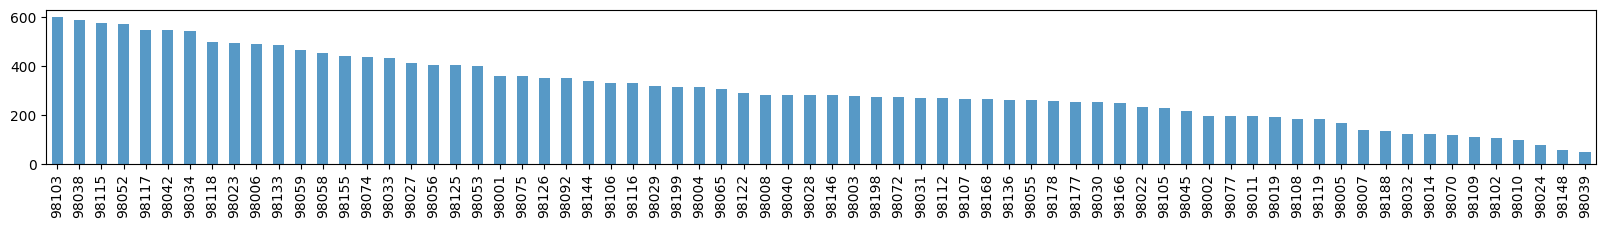

In [74]:
df['zipcode'].value_counts().plot(kind='bar',alpha=0.75, rot=90, figsize=(20, 2))


In [75]:
# df.to_pickle('df.pkl')

In [76]:
# save the DataFrame in a CSV file
df_new.to_csv('data.csv', index=False)# 